## Import Dependencies in Python

In [126]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
import quandl

## Getting WTI monthly data from QUANDL

In [2]:
WTI = quandl.get("FRED/DCOILWTICO", start_date="1990-01-01", end_date="2020-06-01",  authtoken="TYxF4cUU1kEsRwg8QEdu", collapse="monthly", order="asc")
print(WTI)
WTI.to_csv("WTI.csv")

            Value
Date             
1990-01-31  22.69
1990-02-28  21.55
1990-03-31  20.34
1990-04-30  18.50
1990-05-31  17.47
...           ...
2020-02-29  44.83
2020-03-31  20.51
2020-04-30  19.23
2020-05-31  35.57
2020-06-30  35.49

[366 rows x 1 columns]


## Getting BRENT monthly data from QUANDL

In [3]:
BRENT = quandl.get("FRED/DCOILBRENTEU", start_date="1990-01-01", end_date="2020-06-01",  authtoken="TYxF4cUU1kEsRwg8QEdu", collapse="monthly", order="asc")
print(BRENT)
BRENT.to_csv("BRENT.csv")

            Value
Date             
1990-01-31  20.50
1990-02-28  19.20
1990-03-31  17.95
1990-04-30  16.35
1990-05-31  15.30
...           ...
2020-02-29  51.31
2020-03-31  14.85
2020-04-30  18.11
2020-05-31  34.15
2020-06-30  36.74

[366 rows x 1 columns]


## Getting ARAB LIGHT monthly data


In [4]:
ARAB_LIGHT = quandl.get("EIA/PET_ISA4990008_M", start_date="1990-01-01", end_date="2020-06-01",  authtoken="TYxF4cUU1kEsRwg8QEdu", collapse="monthly", order="asc")
print(ARAB_LIGHT)
ARAB_LIGHT.to_csv("ARAB_LIGHT.csv")

            Value
Date             
1990-01-31  19.73
1990-02-28  18.71
1990-03-31  16.76
1990-04-30  14.86
1990-05-31  14.72
...           ...
2020-01-31  51.55
2020-02-29  52.48
2020-03-31  24.14
2020-04-30  22.30
2020-05-31  31.84

[358 rows x 1 columns]


## Put WTI data into dataframe with dates as index

In [179]:
WTI_data = pd.read_csv('WTI.csv', parse_dates=['Date'], index_col='Date')
print (WTI_data.head())

            Value
Date             
1990-01-31  22.69
1990-02-28  21.55
1990-03-31  20.34
1990-04-30  18.50
1990-05-31  17.47


## Put BRENT data into dataframe with dates as index

In [180]:
BRENT_data = pd.read_csv('BRENT.csv', parse_dates=['Date'], index_col='Date')
print (BRENT_data.head())

            Value
Date             
1990-01-31  20.50
1990-02-28  19.20
1990-03-31  17.95
1990-04-30  16.35
1990-05-31  15.30


## Put ARAB LIGHT data into dataframe with dates as index

In [181]:
#Put ARAB_LIGHT data into dataframes with dates as index
ARAB_LIGHT_data = pd.read_csv('ARAB_LIGHT.csv', parse_dates=['Date'], index_col='Date')
print (ARAB_LIGHT_data.head())

            Value
Date             
1990-01-31  19.73
1990-02-28  18.71
1990-03-31  16.76
1990-04-30  14.86
1990-05-31  14.72


## Step 1: Plot WTI, BRENT, and ARAB LIGHT data for to visually inspect time series data

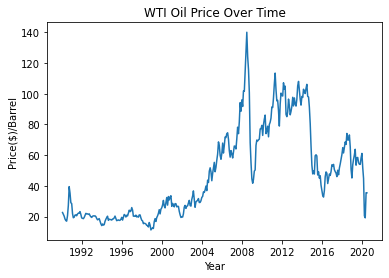

In [20]:
plt.xlabel('Year')
plt.ylabel('Price($)/Barrel')
plt.title('WTI Oil Price Over Time')
plt.plot(WTI_data)

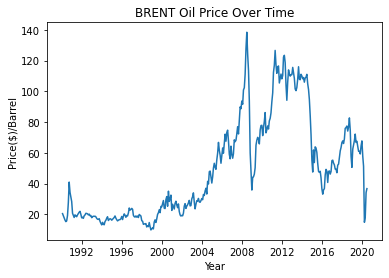

In [21]:
#Plot BRENT data for visualization purposes
plt.xlabel('Year')
plt.ylabel('Price($)/Barrel')
plt.title('BRENT Oil Price Over Time')
plt.plot(BRENT_data)

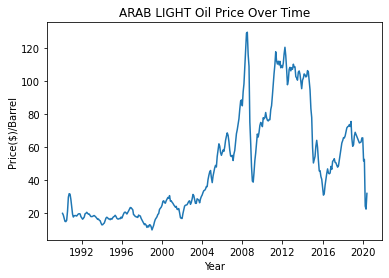

In [22]:
#Plot ARAB LIGHT data for visualization purposes
plt.xlabel('Year')
plt.ylabel('Price($)/Barrel')
plt.title('ARAB LIGHT Oil Price Over Time')
plt.plot(ARAB_LIGHT_data)

# Step 2: Determine Whether Time Series Data are Stationary 
## Step 2a: Plot the rolling means and rolling standard deviations of time series data
#### The time series is stationary if the means and SD remain constant with time
## Step 2b: Test for Stationarity in the time series data using the Dickey-Fuller Test.
#### If the p-value for this test is > .05 on the test, we accept the null hypothesis and conclude the time series is not stationary. 
#### If the p-value  for this test is <= .05, we reject the null hypothesis and conclude the time series is stationary.
#### If the ADF Statistic is much lower than the critical values, that also confirms the time series is stationary.

In [115]:
def test_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

## WTI Stationarity Tests

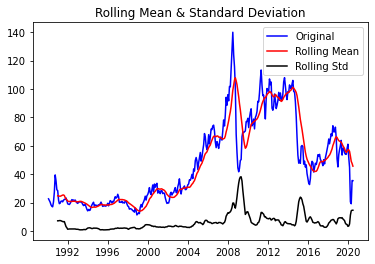

ADF Statistic: -2.2421730012268637
p-value: 0.19129653045751688
Critical Values:
	1%: -3.4484434475193777
	5%: -2.869513170510808
	10%: -2.571017574266393


In [54]:
test_stationarity(WTI_data)

### As we can see in the figure and Dickey Fuller test above, the WTI time series data are not stationary. The rolling mean and SD are not constant over time,  the WTI Dickey Fuller test is  > .05. Thus, we accept the null hypothesis and conclude the data is non-stationary.

## BRENT Stationarity Tests

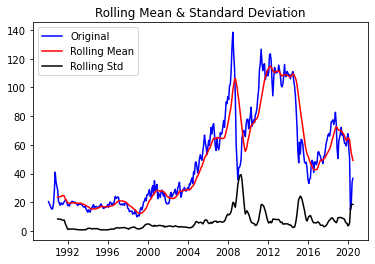

ADF Statistic: -2.204984301519696
p-value: 0.20444141916575093
Critical Values:
	1%: -3.4484434475193777
	5%: -2.869513170510808
	10%: -2.571017574266393


In [56]:
test_stationarity(BRENT_data)

### As we can see in the figure and Dickey Fuller test above, the BRENT time series data are not stationary. The rolling mean and SD are not constant over time,  the WTI Dickey Fuller test is  > .05. Thus, we accept the null hypothesis and conclude the data is non-stationary.

## ARAB LIGHT Stationarity Tests

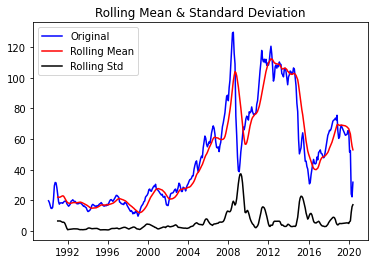

ADF Statistic: -1.5832086025968932
p-value: 0.4920226682141645
Critical Values:
	1%: -3.4494474563375737
	5%: -2.8699542285903887
	10%: -2.5712527305187987


In [59]:
test_stationarity(ARAB_LIGHT_data)

### As we can see in the figure and Dickey Fuller test above, the ARAB time series data are not stationary. The rolling mean and SD are not constant over time,  the WTI Dickey Fuller test is  > .05. Thus, we accept the null hypothesis and conclude the data is non-stationary.

## Differencing the Data - Transform the data 

In [116]:
WTI_log = np.log(WTI_data)
BRENT_log = np.log(BRENT_data)
ARAB_LIGHT_log = np.log(ARAB_LIGHT_data)
WTI_log_diff = WTI_log - WTI_log.shift()
WTI_log_diff.dropna(inplace=True)
BRENT_log_diff = BRENT_log - BRENT_log.shift()
BRENT_log_diff.dropna(inplace=True)
ARAB_LIGHT_log_diff = ARAB_LIGHT_log - ARAB_LIGHT_log.shift()
ARAB_LIGHT_log_diff.dropna(inplace=True)

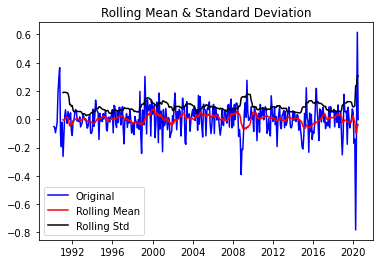

ADF Statistic: -8.695375340950026
p-value: 3.938069063496756e-14
Critical Values:
	1%: -3.448748905151901
	5%: -2.8696473721448728
	10%: -2.5710891239349585


In [117]:
test_stationarity(WTI_log_diff)

### As we can see in the figure and Dickey Fuller test above, the transformed log differenced WTI time series data are stationary. The rolling mean and SD are relatively constant over time, the WTI Dickey Fuller test is  < .05, and the ADF statistic is much lower than the critical values. Thus, we can reject the null hypothesis and conclude the data stationary.

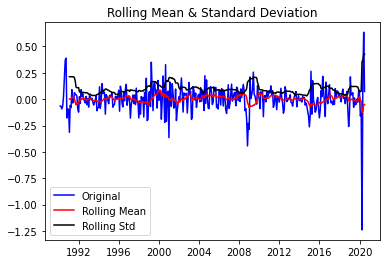

ADF Statistic: -14.151908118282382
p-value: 2.1545202896063786e-26
Critical Values:
	1%: -3.448493650810824
	5%: -2.8695352280356556
	10%: -2.5710293341377715


In [118]:
test_stationarity(BRENT_log_diff)

### As we can see in the figure and Dickey Fuller test above, the transformed log differenced BRENT time series data are stationary. The rolling mean and SD are relatively constant over time, the WTI Dickey Fuller test is  < .05, and the ADF statistic is much lower than the critical values. Thus, we can reject the null hypothesis and conclude the data stationary.

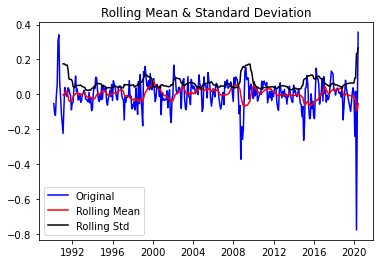

ADF Statistic: -5.319419279049635
p-value: 4.990630494931292e-06
Critical Values:
	1%: -3.4494474563375737
	5%: -2.8699542285903887
	10%: -2.5712527305187987


In [113]:
test_stationarity(ARAB_LIGHT_log_diff)

### As we can see in the figure and Dickey Fuller test above, the transformed log differenced ARAB LIGHT time series data are stationary. The rolling mean and SD are relatively constant over time, the WTI Dickey Fuller test is  < .05, and the ADF statistic is much lower than the critical values. Thus, we can reject the null hypothesis and conclude the data stationary.

# Step 3: Explore Autocorrelations

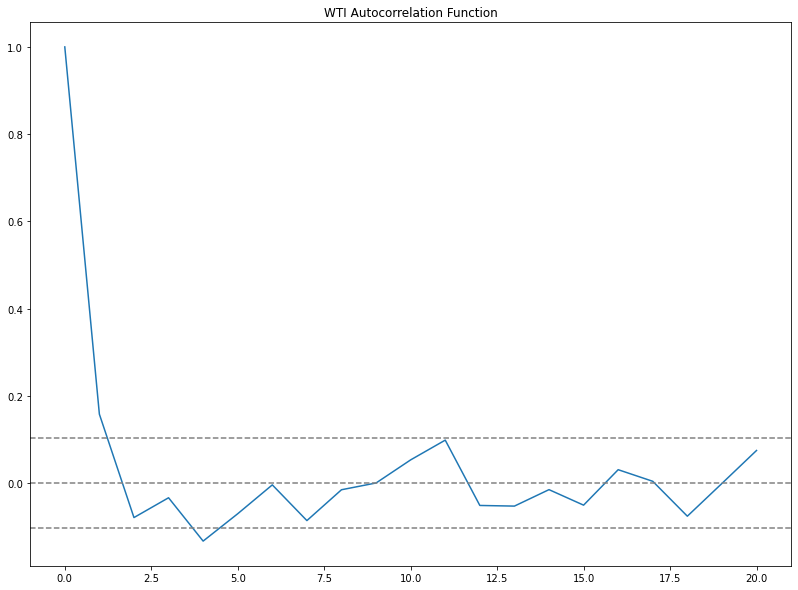

In [144]:
WTI_lag_acf = acf(WTI_log_diff, nlags=20, fft=False)
WTI_lag_pacf = pacf(WTI_log_diff, nlags=20, method='ols')
plt.subplot(121) 
plt.plot(WTI_lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(WTI_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(WTI_log_diff)),linestyle='--',color='gray')
plt.title('WTI Autocorrelation Function')
plt.rcParams["figure.figsize"] = [30,10]

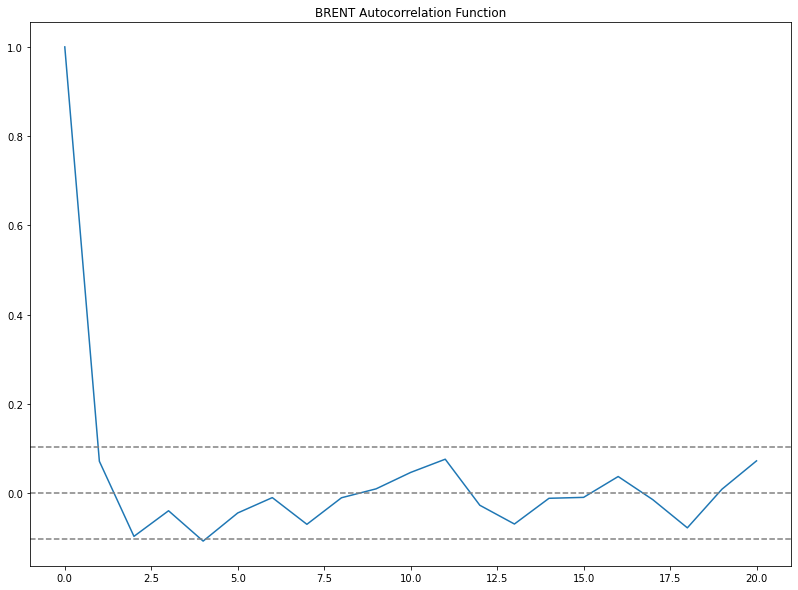

In [143]:
BRENT_lag_acf = acf(BRENT_log_diff, nlags=20, fft=False)
BRENT_lag_pacf = pacf(BRENT_log_diff, nlags=20, method='ols')
plt.subplot(121) 
plt.plot(BRENT_lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(BRENT_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(BRENT_log_diff)),linestyle='--',color='gray')
plt.title('BRENT Autocorrelation Function')
plt.rcParams["figure.figsize"] = [30,10]

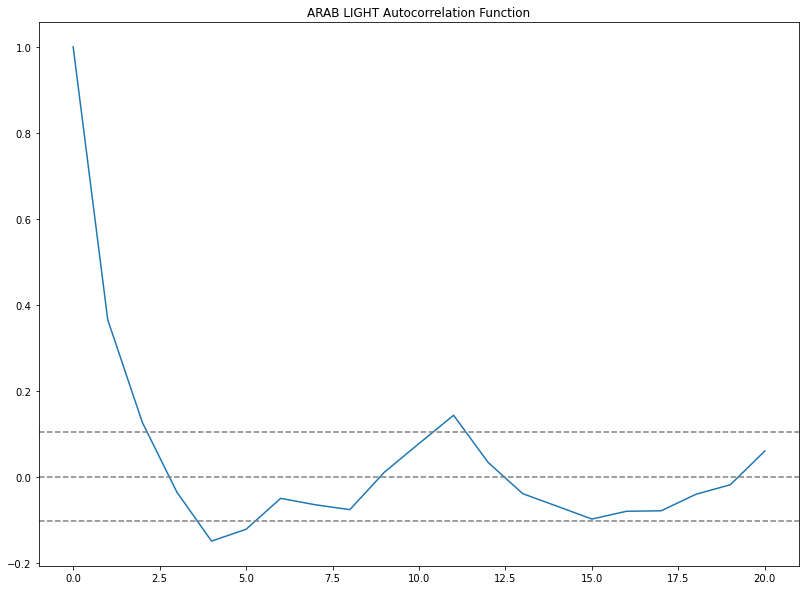

In [145]:
ARAB_LIGHT_lag_acf = acf(ARAB_LIGHT_log_diff, nlags=20, fft=False)
ARAB_LIGHT_lag_pacf = pacf(ARAB_LIGHT_log_diff, nlags=20, method='ols')
plt.subplot(121) 
plt.plot(ARAB_LIGHT_lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ARAB_LIGHT_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ARAB_LIGHT_log_diff)),linestyle='--',color='gray')
plt.title('ARAB LIGHT Autocorrelation Function')
plt.rcParams["figure.figsize"] = [30,10]

In [188]:
oil_data=pd.merge(WTI_data,BRENT_data, on='Date')
oil_data=oil_data.rename(columns={"Value_x": "WTI", "Value_y": "BRENT"})
oil_data=pd.merge(oil_data, ARAB_LIGHT_data,on='Date')
oil_data.rename(columns={"Value": "ARAB Light"})

,WTI,BRENT,ARAB Light
Date,,,
1990-01-31,22.69,20.50,19.73
1990-02-28,21.55,19.20,18.71
1990-03-31,20.34,17.95,16.76
1990-04-30,18.50,16.35,14.86
1990-05-31,17.47,15.30,14.72
...,...,...,...
2020-01-31,51.58,57.77,51.55
2020-02-29,44.83,51.31,52.48
2020-03-31,20.51,14.85,24.14


# ARIMA model

/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


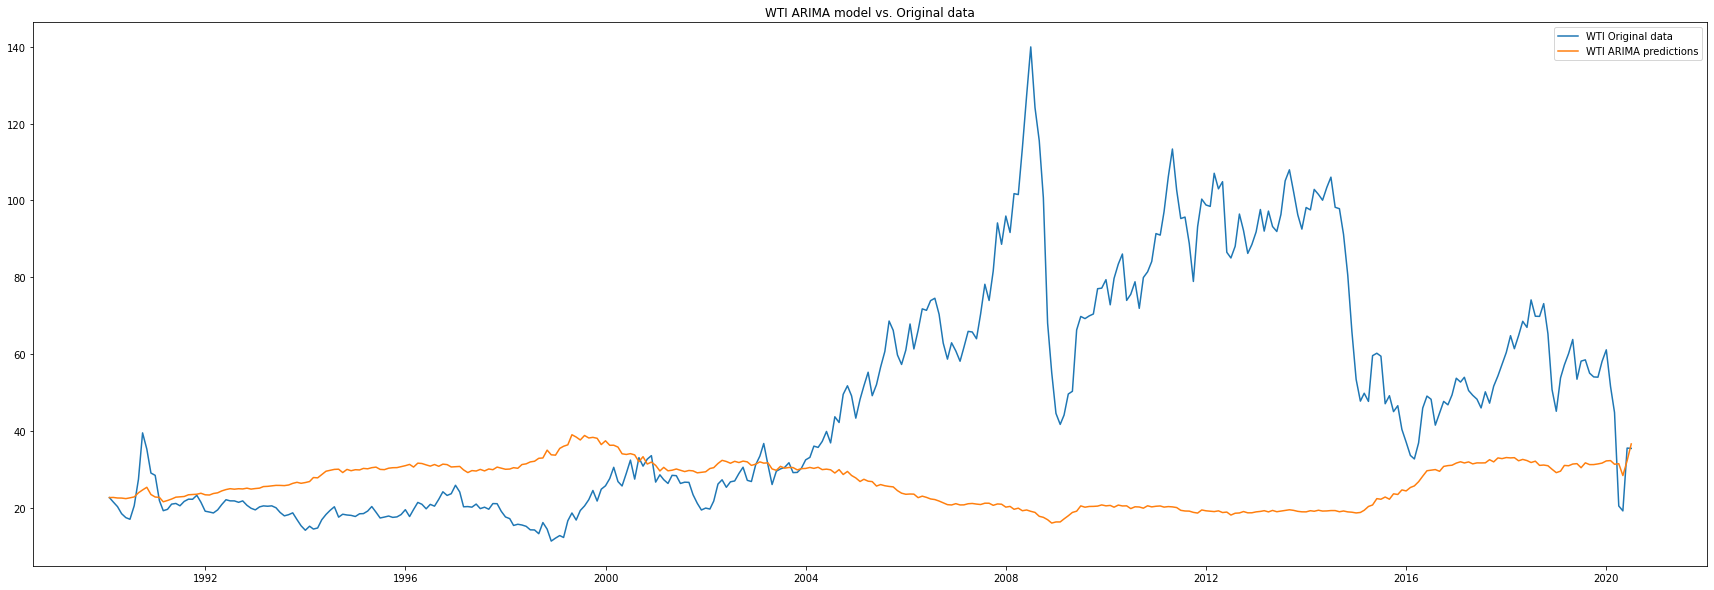

In [153]:
WTI_decomposition = seasonal_decompose(WTI_log) 
WTI_model = ARIMA(WTI_log, order=(2,1,2))
WTI_results = WTI_model.fit(disp=-1)
WTI_predictions_ARIMA_diff = pd.Series(WTI_results.fittedvalues, copy=True)
WTI_predictions_ARIMA_diff_cumsum = WTI_predictions_ARIMA_diff.cumsum()
WTI_predictions_ARIMA_log = pd.Series(WTI_log['Value'].iloc[0], index=WTI_log.index)
WTI_predictions_ARIMA_log = WTI_predictions_ARIMA_log.add(WTI_predictions_ARIMA_diff_cumsum, fill_value=0)
WTI_predictions_ARIMA = np.exp(WTI_predictions_ARIMA_log)
plt.plot(WTI_data, label = 'WTI Original data')
plt.plot(WTI_predictions_ARIMA, label = 'WTI ARIMA predictions')
plt.legend(loc = 'best')
plt.title('WTI ARIMA model vs. Original data')
plt.show()

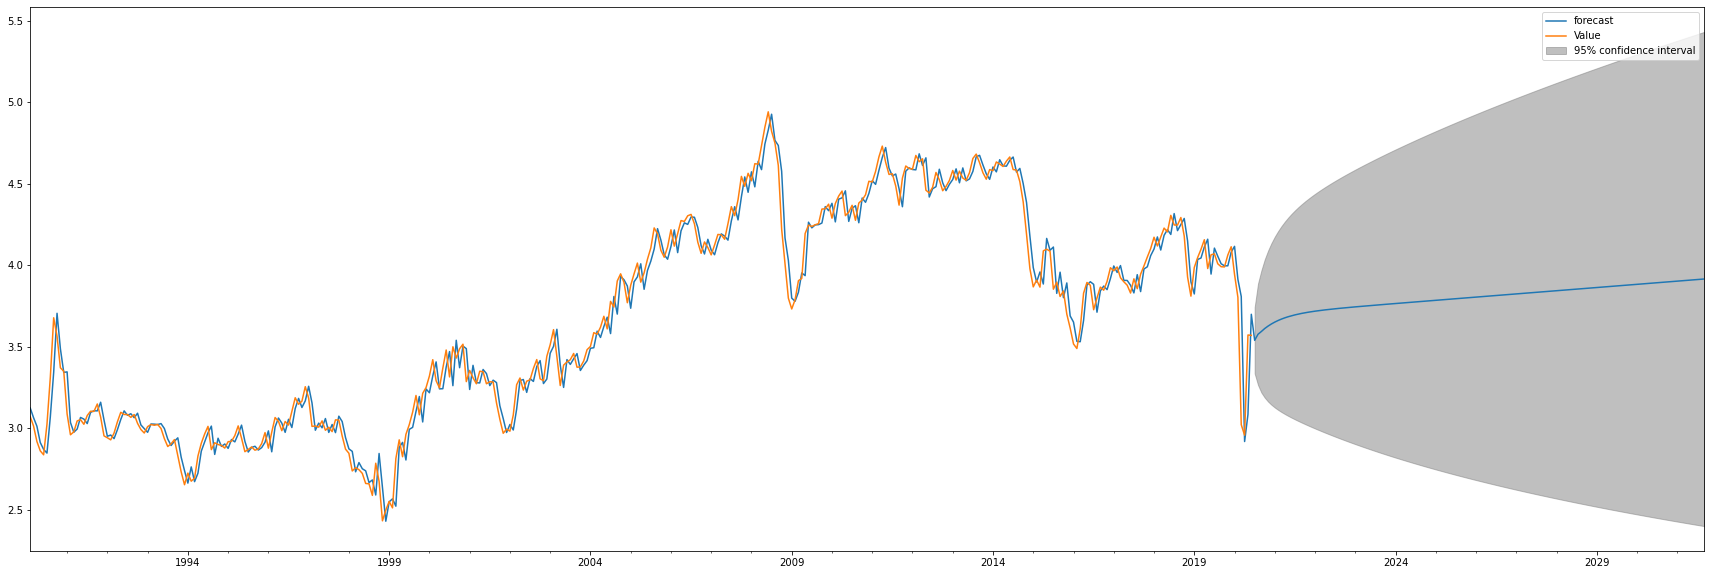

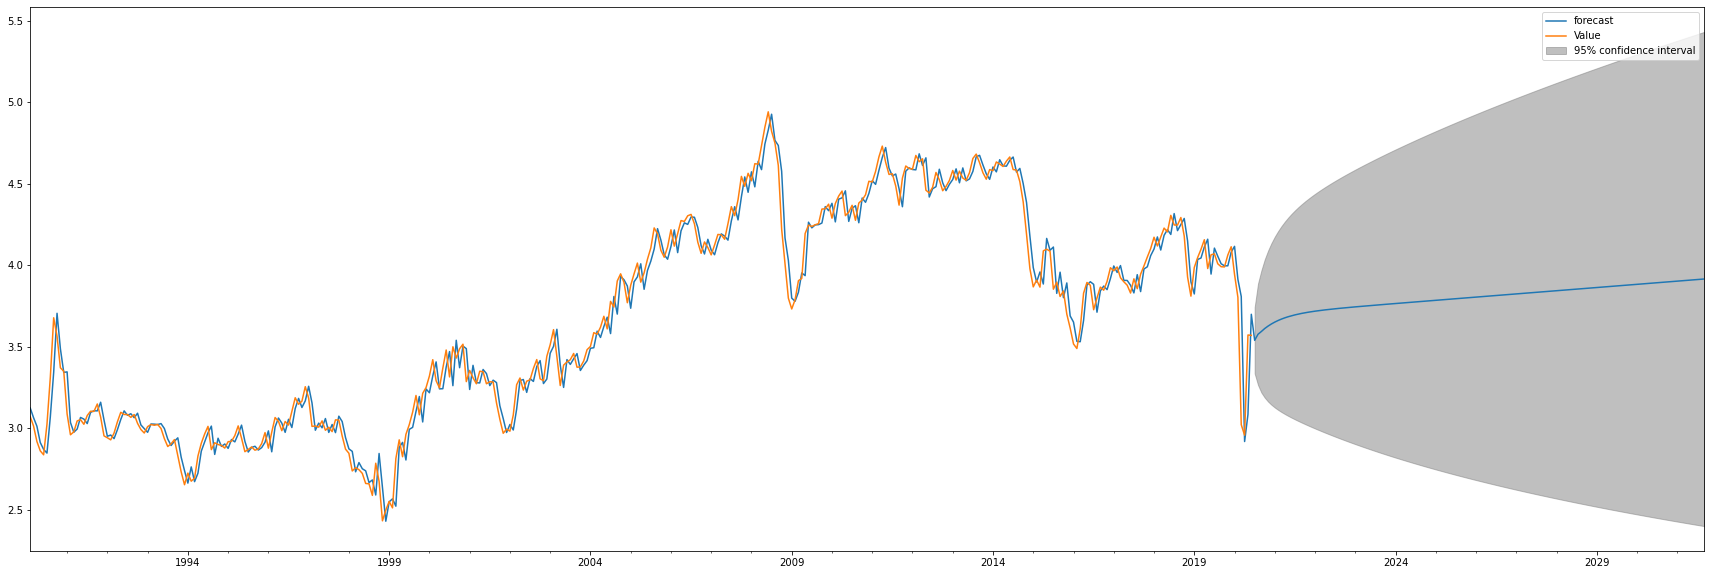

In [156]:
WTI_results.plot_predict(1,500)

/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


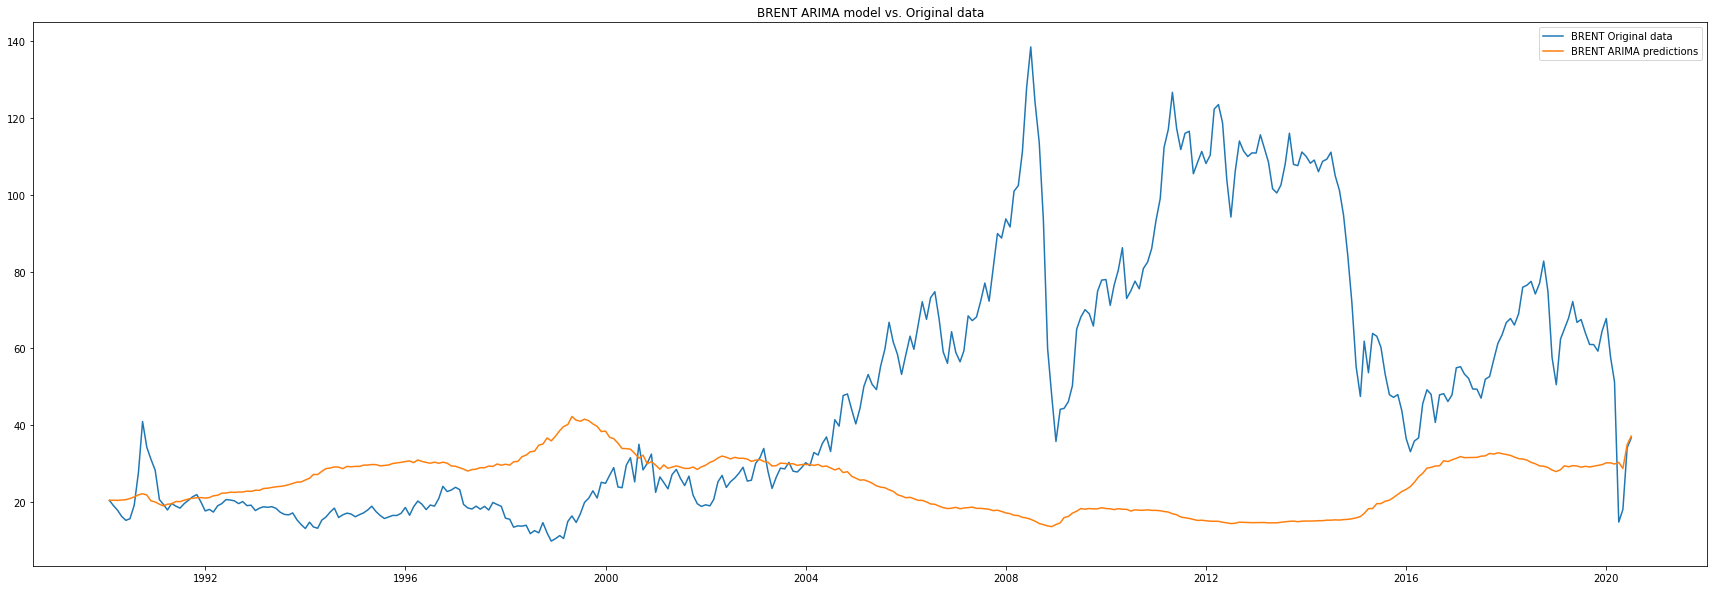

In [157]:
BRENT_decomposition = seasonal_decompose(BRENT_log) 
BRENT_model = ARIMA(BRENT_log, order=(2,1,2))
BRENT_results = BRENT_model.fit(disp=-1)
BRENT_predictions_ARIMA_diff = pd.Series(BRENT_results.fittedvalues, copy=True)
BRENT_predictions_ARIMA_diff_cumsum = BRENT_predictions_ARIMA_diff.cumsum()
BRENT_predictions_ARIMA_log = pd.Series(BRENT_log['Value'].iloc[0], index=BRENT_log.index)
BRENT_predictions_ARIMA_log = BRENT_predictions_ARIMA_log.add(BRENT_predictions_ARIMA_diff_cumsum, fill_value=0)
BRENT_predictions_ARIMA = np.exp(BRENT_predictions_ARIMA_log)
plt.plot(BRENT_data, label = 'BRENT Original data')
plt.plot(BRENT_predictions_ARIMA, label = 'BRENT ARIMA predictions')
plt.legend(loc = 'best')
plt.title('BRENT ARIMA model vs. Original data')
plt.show()

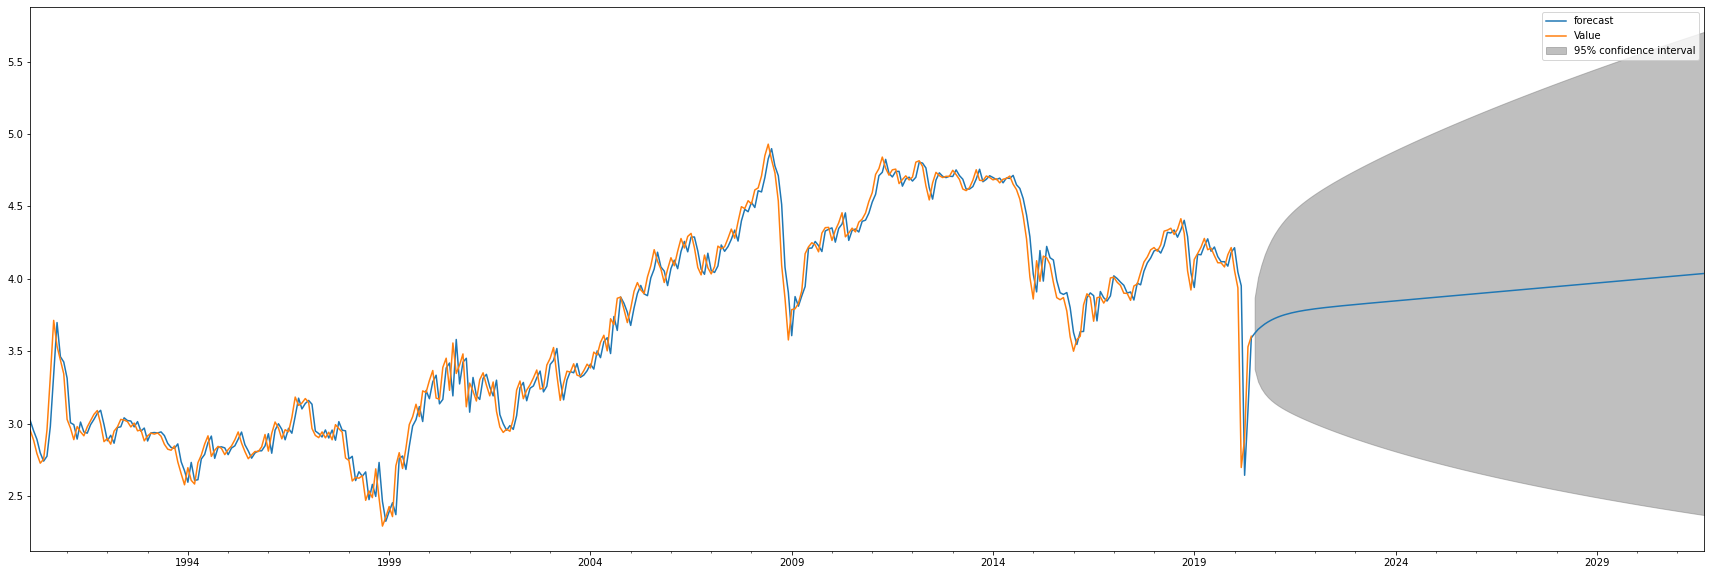

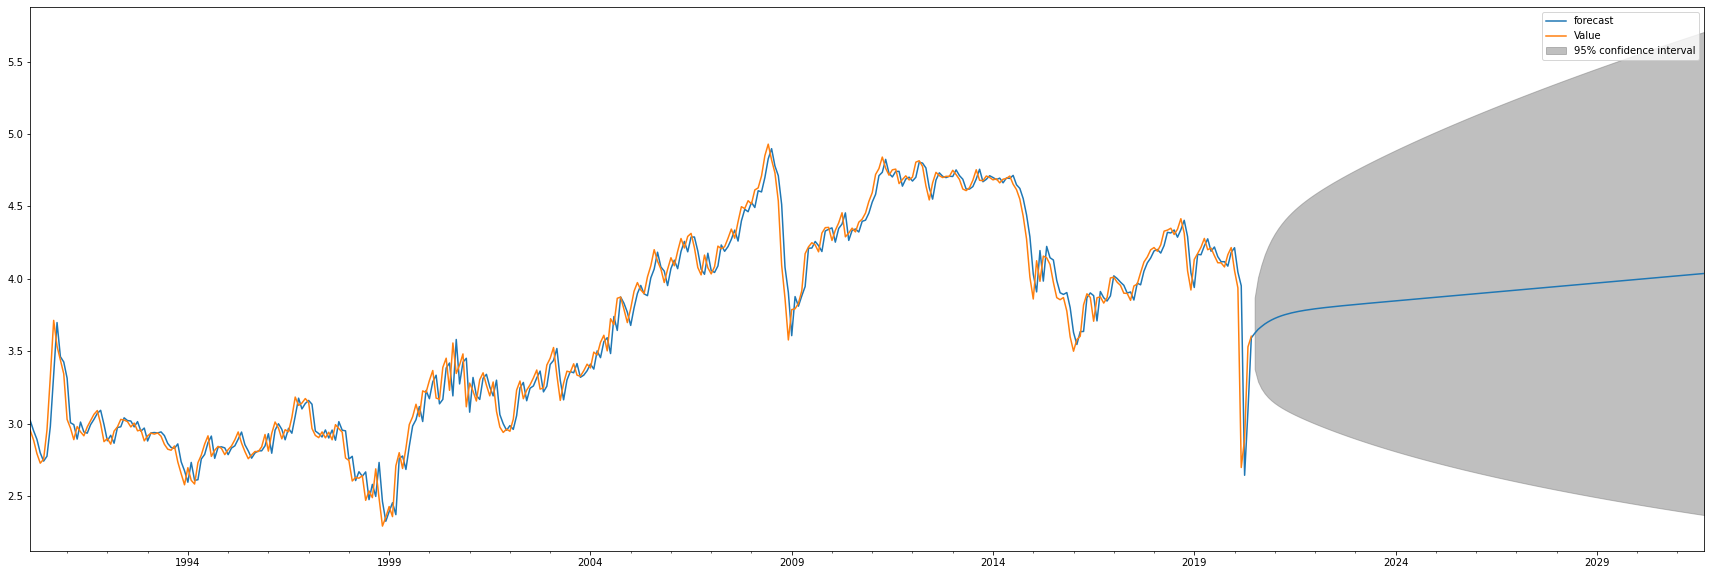

In [158]:
BRENT_results.plot_predict(1,500)